In [14]:
import galkin
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import galkin.plots

In [3]:
import sys
sys.path.append('..')

In [4]:
# import auxiliary modules
import galkin.processdata   # routines to process kinematic data
import galkin.readparsFile  # routines to read and check input parameters


In [6]:
# Galactic parameters
R0=8.0# Galactocentric distance (kpc)
V0=230.# local circular velocity (km/s)
UsunINUSE=11.10# solar motion in the U-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
VsunINUSE=12.24# solar motion in the V-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
WsunINUSE=07.25# solar motion in the W-direction (km/s), e.g. from Schoenrich+ '10, MNRAS 403, 1829 (2010)
SYSTDISP=0.# systematic dispersion due to spiral arm streaming (km/s), e.g. 11.8 km/s from Brand & Blitz '93, A&A 275, 67 (1993)

In [7]:
# Flags
flagPROPERMOTIONS=0	 			# proper motions not supported in current version - please keep at 0
flagHITERMINAL=1				# whether to use HI terminal velocities
flagFich89tab2=1				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 2)
flagMalhotra95=1				# whether to use Malhotra '95, ApJ 448, 138 (1995)
flagMcClureGriffithsDickey07=1			# whether to use McClure-Griffiths & Dickey '07, ApJ 671, 427 (2007)
flagHITHICKNESS=1				# whether to use the HI thickness method
flagHonmaSofue97=1				# whether to use Honma & Sofue '97, PASJ 49, 453 (1997)
flagCOTERMINAL=1				# whether to use CO terminal velocities
flagBurtonGordon78=1				# whether to use Burton & Gordon '78, A&A 63, 7 (1978)
flagClemens85=1					# whether to use Clemens '85, ApJ 295, 422 (1985)
flagKnapp85=1					# whether to use Knapp+ '85, AJ 90, 2 (1985)
flagLuna06=1					# whether to use Luna+ '06, ApJ 641, 938 (2006)
flagHIIREGIONS=1				# whether to use HII regions
flagBlitz79=1					# whether to use Blitz '79, ApJL 231, L115 (1979)
flagFich89tab1=1				# whether to use Fich+ '89, ApJ 342, 272 (1989) (Table 1)	
flagTurbideMoffat93=1				# whether to use Turbide & Moffat '93, AJ 105, 5 (1993)
flagBrandBlitz93=1				# whether to use Brand & Blitz '93, A&A 275, 67 (1993)
flagHou09tabA1=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A1)
flagGMC=1					# whether to use giant molecular clouds
flagHou09tabA2=1				# whether to use Hou+ '09, A&A 499, 473 (2009) (Table A2)
flagOPENCLUSTERS=1				# whether to use open clusters
flagFrinchaboyMajewski08=1			# whether to use Frinchaboy & Majewski '08, AJ 136, 118 (2008)
flagPLANETARYNEBULAE=1				# whether to use planetary nebulae
flagDurand98=1					# whether to use Durand+ '98, A&AS 132, 13 (1998)
flagCEPHEIDS=1					# whether to use classical cepheids
flagPont94=1					# whether to use Pont+ '94, A&A 285, 415 (1994)
flagPont97=1					# whether to use Pont+ '97, A&A 318, 416 (1997)
flagCSTARS=1					# whether to use carbon stars
flagDemersBattinelli07=1			# whether to use Demers & Battinelli '07, A&A 473, 143 (2007)
flagBattinelli12=1				# whether to use Battinelli+ '12, Ap 56, 68 (2013)
flagMASERS=1					# whether to use masers
flagReid14=1					# whether to use Reid+ '14, ApJ 783, 130 (2014)
flagHonma12=1					# whether to use Honma+ '12, PASJ 64, 136 (2012)
flagStepanishchevBobylev11=1			# whether to use Stepanishchev & Bobylev '11, AstL 37, 4 (2011)
flagXu13=1					# whether to use Xu+ '13, ApJ 769, 15 (2013)
flagBobylevBajkova13=1				# whether to use Bobylev & Bajkova '13, AstL 39, 809 (2013)
flagastropy=0				 	# whether to use astropy for equatorial-to-galactic conversions


In [8]:
inputpars=(R0,V0,UsunINUSE,VsunINUSE,WsunINUSE,SYSTDISP, flagPROPERMOTIONS,flagHITERMINAL,flagFich89tab2,flagMalhotra95,flagMcClureGriffithsDickey07, flagHITHICKNESS,flagHonmaSofue97,flagCOTERMINAL,flagBurtonGordon78,flagClemens85,flagKnapp85,flagLuna06, flagHIIREGIONS,flagBlitz79,flagFich89tab1,flagTurbideMoffat93,flagBrandBlitz93,flagHou09tabA1, flagGMC,flagHou09tabA2,flagOPENCLUSTERS,flagFrinchaboyMajewski08,flagPLANETARYNEBULAE,flagDurand98,flagCEPHEIDS,flagPont94,flagPont97, flagCSTARS,flagDemersBattinelli07,flagBattinelli12, flagMASERS,flagReid14,flagHonma12,flagStepanishchevBobylev11,flagXu13,flagBobylevBajkova13,flagastropy)

In [9]:
galkin.readparsFile.CheckAndPrintParameters(inputpars)

checking validity of input parameters...
printing input parameters...
 R0=  8.0  kpc
 V0=  230.0  km/s
 (Usun,Vsun,Wsun) = ( 11.1 , 12.24 , 7.25 ) km/s
 systematic dispersion =  0.0  km/s
 use HI terminal velocities?            1
  use Fich+ 89(Table 2)?                  1
  use Malhotra 95?                        1
  use McClure-Griffiths & Dickey 07?      1
 use HI thickness method?               1
  use Honma & Sofue 97?                   1
 use CO terminal velocities?            1
  use Burton & Gordon 78?                 1
  use Clemens 85?                         1
  use Knapp+ 85?                          1
  use Luna+ 06?                           1
 use HII regions?                       1
  use Blitz 79?                           1
  use Fich+ 89 (Table 1)?                 1
  use Turbide & Moffat 93?                1
  use Brand & Blitz 93?                   1
  use Hou+ 09 (Table A1)?                 1
 use giant molecular clouds?            1
  use Hou+ 09 (Table A2)?     

In [10]:
vecout=galkin.processdata.ProcessData(inputpars)
totallistvc=vecout[0]; # list of {R[kpc], delta_R[kpc], vc[km/s], delta_vc[km/s], wc[km/s/kpc], delta_wc[km/s/kpc], Reference}

processing HI terminal velocities...
 processing Fich+ 89 (Table 2)...
  selected  149  HI terminal velocities
 processing Malhotra 95...
  selected  110  HI terminal velocities
 processing McClure-Griffiths & Dickey 07...
  selected  701  out of the total sample of  761  HI terminal velocities
processing HI thickness method...
 processing Honma & Sofue 97...
  selected  13  HI thickness rings
processing CO terminal velocities...
 processing Burton & Gordon 78...
  selected  284  CO terminal velocities
 processing Clemens 85...
  selected  143  CO terminal velocities
 processing Knapp+ 85...
  selected  37  CO terminal velocities
 processing Luna+ 06...
  selected  272  out of the total sample of  457  CO terminal velocities
processing HII regions...
 processing Blitz 79...
  selected  3  HII regions
 processing Fich+ 89 (Table 1)...
  selected  5  out of the total sample of  104  HII regions
 processing Turbide & Moffat 93...
  selected  5  out of the total sample of  8  HII regions
 

In [11]:
print totallistvc[0]

[2.070552360820166, 0.0, 204.7522462861832, 4.5, 98.88774133926218, 2.173333109150404, 'Fich89_Table2']


In [12]:
print totallistvc[len(totallistvc)-1]

[7.612212812065508, 0.010544186304777303, 236.3513518499254, 8.658320507429012, 31.048967978838405, 1.1366115200893554, 'BobylevBajkova13']


In [28]:
vcfile = open("/Users/atalia/galkin/bin/output/vcdata.dat",'r')


In [26]:
print r

<open file '/Users/atalia/galkin/bin/output/vcdata.dat', mode 'r' at 0x1080bcf60>


In [30]:
totallistvc=[]
i=0
for line in vcfile:
    i+=1
    values=line.split()
    if(i>2):
        totallistvc.append([float(values[0]),float(values[1]),float(values[2]),float(values[3]),float(values[4]),float(values[5]),values[6]])

In [40]:
#print totallistvc

In [31]:
posfile = open("/Users/atalia/galkin/bin/output/posdata.dat",'r')
totallistpos=[]
i=0

In [32]:
for line in posfile:
    i+=1
    values=line.split()
    if(i>2):
        totallistpos.append([float(values[0]),float(values[1]),float(values[2]),float(values[3]),float(values[4]),float(values[5]),float(values[6]),values[7]])

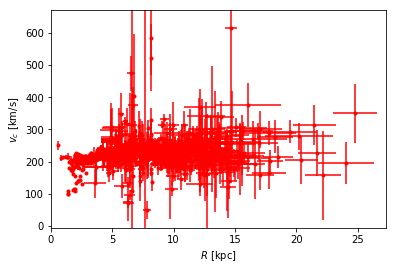

In [38]:
# plot rotation curve measurements
galkin.plots.PlotRotationCurve(totallistvc)

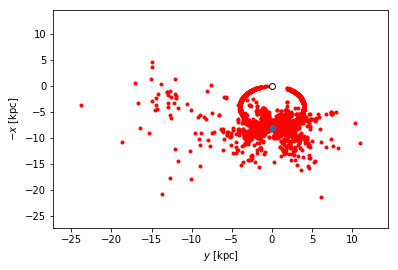

In [37]:
# plot positions in galactic plane
galkin.plots.PlotPositions(totallistpos)

In [41]:
?galkin.plots.PlotRotationCurve

Signature: galkin.plots.PlotRotationCurve(totallistvc)
Docstring: <no docstring>
File:      ~/miniconda2/lib/python2.7/site-packages/galkin-1.0-py2.7.egg/galkin/plots.py
Type:      function
